In [7]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage


%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

# Hierarchical Clustering Examples

In this section, we will work through two examples of using hierarchical clustering. We will illustrate how linkage affects the final clustering as well as how hierarchical clustering compares to k-means clustering used on the same dataset. Finally, we will discuss the advantages and disadvantages of hierarchical clustering.

## A 2-Dimensional Example

Let's return to our unknown coins dataset from [Section 26.1](../1/kmeans.ipynb). Recall that we have measurements of coin weight and diameter for 100 coins.


In [8]:
coins = pd.read_csv("../../data/coins.csv")
def standard_units(my_data):
    '''Takes in an array of data and returns that data standardized by subtracting the mean 
    and dividing by the standard deviation'''

    my_mean = np.mean(my_data)
    my_stddev = np.std(my_data, ddof = 1)
    standardized_data = (my_data - my_mean) / my_stddev
    
    return standardized_data

coins_su = coins.copy()
coins_su['diameter'] = standard_units(coins['diameter'])
coins_su['weight'] = standard_units(coins['weight'])

In [9]:
coins_su.head()

,weight,diameter
0,-0.735768,-1.158194
1,-0.882571,-1.426307
2,-0.662367,-1.186729
3,-1.579885,-1.007809
4,-0.772469,-1.252215


We can use clustering to group these coins into potential denominations. Because this dataset only has two features, we can easily visualize it graphically and see that there are likely 3 clusters in our data.

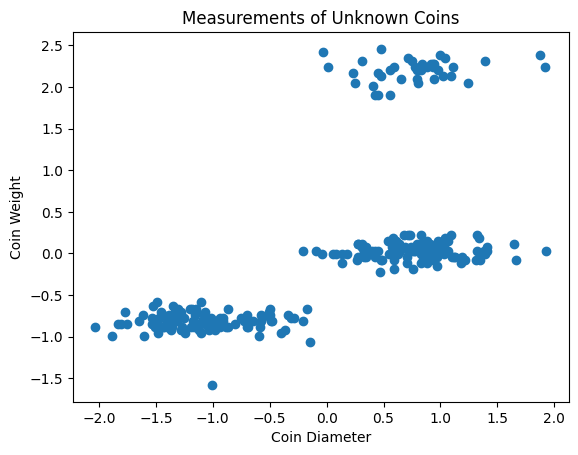

In [10]:
plt.scatter(coins_su['diameter'],coins_su['weight'])
plt.xlabel('Coin Diameter')
plt.ylabel('Coin Weight')
plt.title('Measurements of Unknown Coins');

The first step in clustering this data using hierarchical clustering is to import the necessary functions. We will be using `dendrogram()`, `linkage()`, and `fcluster` from `scipy.cluster.hierarchy`. 

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [12]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(["#D81B60","#1E88E5","#FFC107","#004D40"])

We can use the `linkage()` function to cluster the data. The function takes in a dataset and the type of linkage you want to use as `method`. You can also change the distance metric used by using the argument `method`. The default distance metric is euclidean distance. Remember that you don't need to give a number of clusters for hierarchical clustering. For more information about the `linkage()` function, you can see the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html). For this problem, we will use euclidean distance and complete linkage.

In [13]:
Z = linkage(coins_su, method='complete')

We can use the `dendrogram()` function to depict our clustering. This function has a lot of options for customization which you can find more information about [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html). For our purposes, we will mostly use the default options. The function takes in a linkage matrix (which conveniently is the output of `linkage()`). The argument `no_labels` can be set to `True` to keep row labels from being printed at the leaves of the dendrogram. We will set this equal to `True` to avoid unnecessary clutter on our plot. Lastly, I am setting the argument `above_threshold_color` equal to `k` to make the top of the dendrogram appear black so that it contrasts well with the colored clusters. 

```{note}
If you run this code yourself at home, your dendrogram will likely be colored differently from the one here. We have used the function `set_link_color_palette` to choose colorblind-friendly colors for our dendrograms.
```

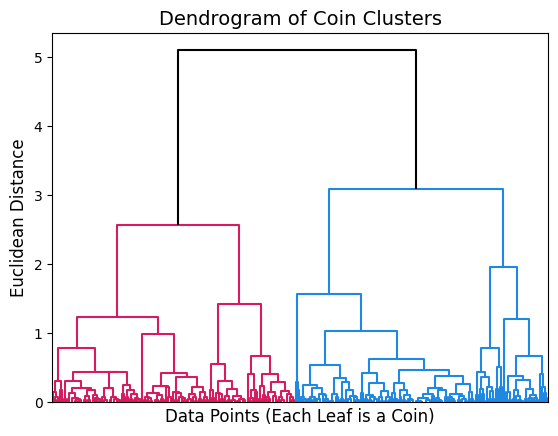

In [14]:
dendrogram(Z, no_labels=True, above_threshold_color='k');

plt.xlabel('Data Points (Each Leaf is a Coin)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.title('Dendrogram of Coin Clusters', fontsize=14);

The dendrogram above shows that our coin data has two major clusters depicted in pink and blue. Looking at where these two clusters are joined on the y-axis we can see that they are about 5 units apart, measured in Euclidean distance using complete linkage. The following animation shows the iterative clustering process.

![](agglomerative_clustering.mp4)

By default, the `dendrogram()` function will choose a cut point that it deems appropriate for your data and color clusters appropriately. However, you can also customize the plot using the argument `color_threshold` to change where the cut should be placed. In this case, we know that there should be 3 clusters in our data so we can choose a cut point that gives us 3 clusters. The appropriate cut point seems to be around 2.9.

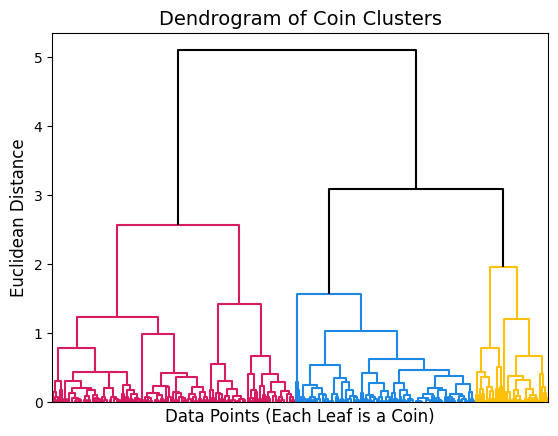

In [15]:
dendrogram(Z, no_labels=True, color_threshold=2.9, above_threshold_color='k');

plt.xlabel('Data Points (Each Leaf is a Coin)', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.title('Dendrogram of Coin Clusters', fontsize=14);

We can use the function `fcluster()` to extract the cluster membership of each row in our original dataset. This function takes in the linkage matrix as well as the cut point for clusters as `t` and the criterion used to determine clusters as `criterion`. We will be determining clusters based on their distance from each other and using 2.9 as our cut point. The cluster memberships are printed below.

In [16]:
clusters = fcluster(Z, t=2.9, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       3, 2, 1, 1, 3, 3, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 1, 1, 2, 2, 3,
       1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3,
       1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 3, 3, 3, 2, 1], dtype=int32)

Now, we can use these cluster memberships to color our original graph of coin data based on cluster membership.

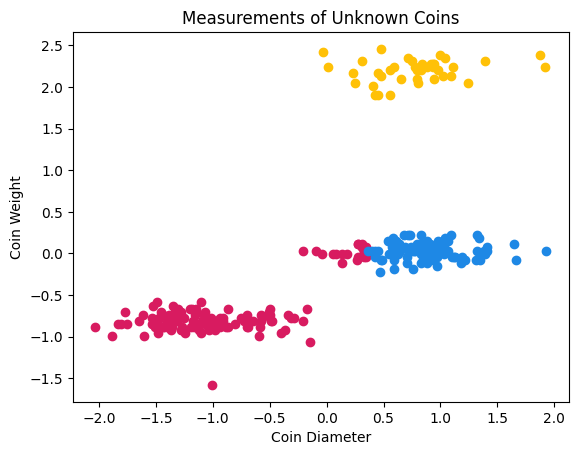

In [17]:
coins_clust1 = coins_su[clusters == 1]
coins_clust2 = coins_su[clusters == 2]
coins_clust3 = coins_su[clusters == 3]

plt.scatter(coins_clust1['diameter'],coins_clust1['weight'],color="#D81B60")
plt.scatter(coins_clust2['diameter'],coins_clust2['weight'],color="#1E88E5")
plt.scatter(coins_clust3['diameter'],coins_clust3['weight'],color="#FFC107")
plt.xlabel('Coin Diameter')
plt.ylabel('Coin Weight')
plt.title('Measurements of Unknown Coins');

These clusters don't look exactly as expected. Part of what seems like it should be the blue cluster is colored pink. Recall that complete linkage calculates the distance between the furthest pair of points in a cluster. As our groups of points have an oblong shape, some of the points in the middle group are actually closer to the bottom group than they are to points with larger coin diameters in the middle group. This is what causes part of the middle group to actually be clustered with the points in the bottom group. This illustrates the importance of understanding linkage and how it affects the final clustering.

Notice that, as in our k-means illustration, if we hadn't been able to visualize the data, we wouldn't have known there should be 3 clusters and might have used the two clusters from our dendrogram as our final clustering. It becomes much harder to visualize our data when we have larger numbers of features.

## A Larger Example

Recall our preprocessed countries dataset from [Section 26.2](../2/kmeans_example.ipynb). The data has been cleaned, standardized, and one-hot-encoded. For additional details on this, please return to Section 26.2.

In [18]:
countries = pd.read_csv("../../data/world-data-2023.csv")
countries_clean = countries.drop(columns = ['Abbreviation', 'Calling Code', 'Capital/Major City', 'Largest city', 'Latitude', 'Longitude'])

def str_to_num(my_input):
    '''Takes in a number in string format and removes commas 
    and percentage signs before returning it as a float or int
    
    If the string is not a number or input is not a string, 
    returns the input'''


    if type(my_input) is str:

        cleaned_input = my_input.strip() #strip trailing whitespace
        cleaned_input = cleaned_input.removeprefix("$").removesuffix("%") #remove these characters if they are present
        
        if cleaned_input.isdigit():
            return int(cleaned_input)
        elif ("." in cleaned_input) and (cleaned_input.replace(".","").replace("-","").isdigit()): #is the only non-digit character a "."
            return float(cleaned_input)
        elif ("," in cleaned_input) and (cleaned_input.replace(",","").replace("-","").isdigit()): #is the only non-digit character a ","
            return int(cleaned_input.replace(",",""))
        elif ("." in cleaned_input) and ("," in cleaned_input) and (cleaned_input.replace(".","").replace(",","").replace("-","").isdigit()): #contains 2 non-digit characters "," and "."
            return float(cleaned_input.replace(",",""))
        else:
            return my_input
    else:
        return my_input
    
countries_clean = countries_clean.map(str_to_num) #apply this function to every cell in the dataframe
countries_clean = countries_clean.dropna(subset=countries_clean.columns.difference(['Official language','Currency code']),ignore_index = True) #remove rows with any missing numeric values

from sklearn.preprocessing import StandardScaler
country_names = countries_clean['Country']
num_columns = countries_clean.drop(columns=['Country', 'Currency-Code', 'Official language'])
cat_columns = countries_clean[['Currency-Code', 'Official language']]
cat_dummies = pd.get_dummies(cat_columns,drop_first=True,dummy_na=True)
scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(num_columns),columns=num_columns.columns)
countries_proc = pd.concat([num_scaled,cat_dummies], axis = 1)

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Official language_Standard Chinese,Official language_Swahili,Official language_Tamil,Official language_Thai,Official language_Tok Pisin,Official language_Turkish,Official language_Ukrainian,Official language_Urdu,Official language_Vietnamese,Official language_nan
0,-0.415286,0.795612,-0.154173,0.291391,1.224663,-0.240521,-0.088400,-0.287060,1.372929,-1.345872,...,False,False,False,False,False,False,False,False,False,False
1,-0.199464,0.019721,-0.408926,-0.428702,-0.845903,-0.244393,-0.330935,-0.391937,-0.812584,-0.081090,...,False,False,False,False,False,False,False,False,False,False
2,-0.616720,-1.309641,0.552500,0.277631,0.403835,-0.108204,-0.076922,-0.322019,0.261002,-1.409111,...,False,False,False,False,False,False,False,False,False,False
3,-0.578352,0.247315,0.088726,-0.181027,2.048491,-0.216160,0.790780,1.437589,2.178118,0.804257,...,False,False,False,False,False,False,False,False,False,False
4,-0.621516,0.599053,0.715391,-0.208546,-0.322013,-0.060138,0.562947,5.679292,-0.321802,-0.971302,...,False,False,False,False,False,False,False,False,False,False


In [19]:
countries_proc.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Official language_Standard Chinese,Official language_Swahili,Official language_Tamil,Official language_Thai,Official language_Tok Pisin,Official language_Turkish,Official language_Ukrainian,Official language_Urdu,Official language_Vietnamese,Official language_nan
0,-0.415286,0.795612,-0.154173,0.291391,1.224663,-0.240521,-0.088400,-0.287060,1.372929,-1.345872,...,False,False,False,False,False,False,False,False,False,False
1,-0.199464,0.019721,-0.408926,-0.428702,-0.845903,-0.244393,-0.330935,-0.391937,-0.812584,-0.081090,...,False,False,False,False,False,False,False,False,False,False
2,-0.616720,-1.309641,0.552500,0.277631,0.403835,-0.108204,-0.076922,-0.322019,0.261002,-1.409111,...,False,False,False,False,False,False,False,False,False,False
3,-0.578352,0.247315,0.088726,-0.181027,2.048491,-0.216160,0.790780,1.437589,2.178118,0.804257,...,False,False,False,False,False,False,False,False,False,False
4,-0.621516,0.599053,0.715391,-0.208546,-0.322013,-0.060138,0.562947,5.679292,-0.321802,-0.971302,...,False,False,False,False,False,False,False,False,False,False


We can use hierarchical clustering on this data similarly to how we clustered our coins data. First, we use the `linkage()` function to generate our linkage matrix. We can try this with various types of linkage. Here we will try complete and average linkage since they are the most commonly used.

In [20]:
Z_comp = linkage(countries_proc, method='complete')
Z_avg = linkage(countries_proc, method='average')

Next, we can depict and compare our clusterings using the `dendrogram()` function. I will use the `labels` argument to add the country_names as labels for each leaf and set the argument `orientation` equal to `right` to make more room for the labels.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [110.0, 110.0, 142.5, 142.5],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [126.25, 126.25, 177.5, 177.5],
  [72.5, 72.5, 151.875, 151.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [222.5, 222.5, 253.75, 253.75],
  [112.1875, 112.1875, 238.125, 238.125],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5],
  [175.15625, 175.15625, 307.5, 307.5],
  [345.0, 345.0, 355.0, 355.0]

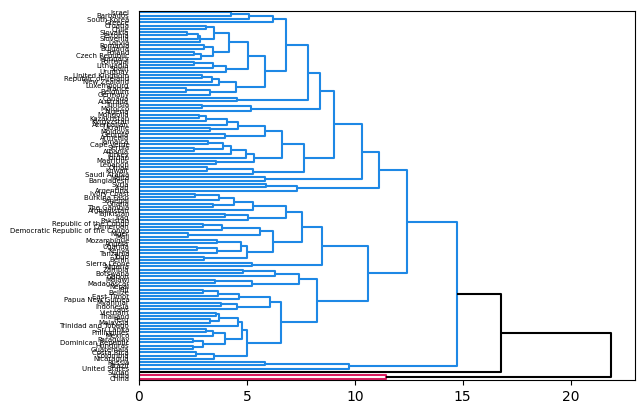

In [25]:
dendrogram(Z_comp, labels=country_names.values, orientation='right', above_threshold_color='k');

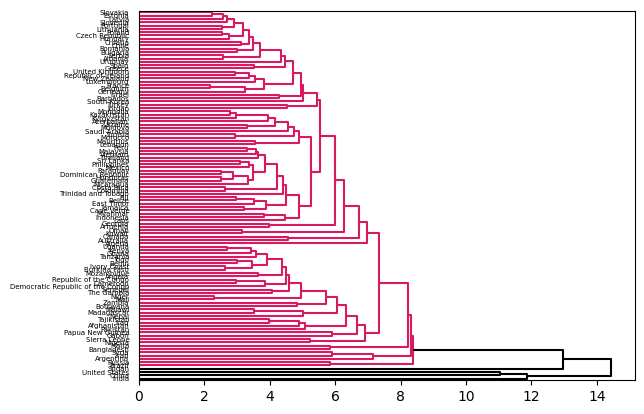

In [24]:
dendrogram(Z_avg, labels=country_names.values, orientation='right', above_threshold_color='k');

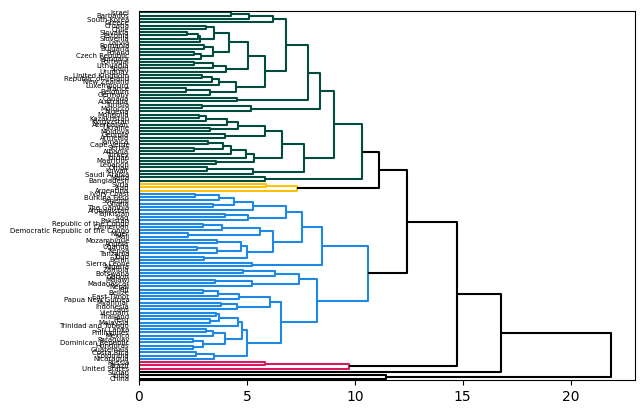

In [28]:
dendrogram(Z_comp, labels=country_names.values, orientation='right', color_threshold=11, above_threshold_color='k');

## Disadvantages of Hierarchical Clustering

While hierarchical clustering has advantages compared to k-means clustering, namely that you do not have to specify the number of clusters and it provides a useful dendrogram for interpretation, it also has several disadvantages. As we've seen, it is very sensitive to the choice of linkage as well as the choice of distance metric. It can also be more time consuming than k-means clustering, especially when datasets are large. Lastly, hierarchical clustering assumes a hierarchical structure in the data which may not make sense for all types of data. Both k-means clustering and hierarchical clustering are useful tools with advantages and disadvantages that should be carefully considered when deciding which to use for a particular dataset or project.